In [1]:
import torch
from torch import optim
from torch import Tensor
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.utils.data import random_split
import torchvision.transforms as tt
import torch.nn as nn
import torch.nn.functional as F 

from utils import *
import config
import random

from typing import Type

# from Classify import Classifier
# from Network_model import Generator, ConvModel
from ConvModel import ConvModel
from Generator import Generator
from GANSSL import GAN

from tqdm.notebook import tqdm

In [2]:
print_config()

RANDOM_SEED   :  11042004
DATA_DIR      :    ./data
USED_DATA     :   CIFAR10
NUM_LABELLED  :       100
DEVICE        :    cuda:0
EPOCHS        :         5
BATCH_SIZE    :       512
LEARNING_RATE :    0.0002
SCHED         :      True
GAN_BATCH_SIZE:       128


In [3]:
set_random_seed(config.RANDOM_SEED)
random.seed(config.RANDOM_SEED)

Setting seeds ...... 



In [4]:
name = "GANSSL"

In [5]:
PATH = get_PATH(name)
PATH

'CIFAR10/GANSSL/_100'

In [6]:

if config.USED_DATA == "CIFAR10":
	mean = [0.5]*3
	std = [0.5]*3

	train_tfm = tt.Compose([
		tt.RandomCrop(32, padding=4, padding_mode='edge'),
		tt.RandomHorizontalFlip(),
		tt.Normalize(mean, std, inplace=True)
	])

if config.USED_DATA == "MNIST" or config.USED_DATA == "DOODLE":
	mean = [0.5]
	std = [0.5]
	train_tfm = tt.Compose([
		tt.Resize(32),
		tt.Normalize(mean, std, inplace=True)
	])

test_tfm = tt.Compose([
	tt.Resize(32),
	tt.Normalize(mean, std)
])

In [7]:
train_ds, test_ds, classes = load_data(train_tfm, test_tfm)

In [8]:
X_full = train_ds.x
y_full = train_ds.y

In [9]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [10]:
latent_size = 100
n_classes = len(classes)
channels = X_full.shape[1]
n_classes, channels

(10, 3)

In [11]:
# test dataloader
test_dl = CreateDataLoader(test_ds, batch_size=config.BATCH_SIZE, device=config.DEVICE)

In [12]:
X_sup, y_sup, X_unsup, _ = supervised_samples(X_full, y_full, config.NUM_LABELLED, n_classes, get_unsup=True) # type: ignore

In [13]:
class Discriminator(nn.Module):
	def __init__(self, in_channels, n_classes) -> None:
		super().__init__()

		self.conv = ConvModel(in_channels)

		self.dropout = nn.Dropout(0.5)

		self.classifier = nn.Linear(512, n_classes)
		
	def forward(self, X: Tensor):
		out = self.conv(X)
		out = self.dropout(out)
		out = self.classifier(out)
		return out

In [14]:
generator = Generator(latent_size, channels)
discriminator = Discriminator(channels, n_classes)

In [15]:
GANSSL = GAN(generator, discriminator, latent_size, config.DEVICE)

In [16]:
GANSSL.load_gen_state_dict(f'DCGAN/{config.USED_DATA}/netG_epoch_009.pt')

FileNotFoundError: [Errno 2] No such file or directory: 'DCGAN/CIFAR10/netG_epoch_009.pt'

In [ ]:
sup_ds = CustomDataSet(X_sup, y_sup, train_tfm)
full_ds = CustomDataSet(X_full, y_full, train_tfm)

In [ ]:
history = GANSSL.fit(20, 64, 100, 0.00001, sup_ds, full_ds, optim.RMSprop, sched = config.SCHED, PATH=PATH+".pt", save=False)

Epoch [0]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 1.50071, D_Loss: 0.26894, lrs: 0.000000-> 0.000001
Epoch [1]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.60416, D_Loss: 0.01263, lrs: 0.000001-> 0.000003
Epoch [2]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.37615, D_Loss: 0.00051, lrs: 0.000003-> 0.000005
Epoch [3]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.18416, D_Loss: 0.00000, lrs: 0.000005-> 0.000008
Epoch [4]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.12393, D_Loss: 0.00000, lrs: 0.000008-> 0.000009
Epoch [5]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.08981, D_Loss: 0.00000, lrs: 0.000009-> 0.000010
Epoch [6]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.07391, D_Loss: 0.00000, lrs: 0.000010-> 0.000010
Epoch [7]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.06509, D_Loss: 0.00000, lrs: 0.000010-> 0.000010
Epoch [8]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.07228, D_Loss: 0.00000, lrs: 0.000009-> 0.000009
Epoch [9]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.04124, D_Loss: 0.00000, lrs: 0.000009-> 0.000008
Epoch [10]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.03811, D_Loss: 0.00000, lrs: 0.000008-> 0.000007
Epoch [11]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.03722, D_Loss: 0.00000, lrs: 0.000007-> 0.000006
Epoch [12]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.03259, D_Loss: 0.00000, lrs: 0.000006-> 0.000005
Epoch [13]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.02984, D_Loss: 0.00000, lrs: 0.000005-> 0.000004
Epoch [14]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.02462, D_Loss: 0.00000, lrs: 0.000004-> 0.000003
Epoch [15]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.02377, D_Loss: 0.00000, lrs: 0.000003-> 0.000002
Epoch [16]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.03072, D_Loss: 0.00000, lrs: 0.000002-> 0.000001
Epoch [17]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.02024, D_Loss: 0.00000, lrs: 0.000001-> 0.000000
Epoch [18]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.01746, D_Loss: 0.00000, lrs: 0.000000-> 0.000000
Epoch [19]:


  0%|          | 0/100 [00:00<?, ?it/s]

C_Loss: 0.02763, D_Loss: 0.00000, lrs: 0.000000-> 0.000000


In [ ]:
d = Discriminator(channels, n_classes).to(config.DEVICE)
d.load_state_dict(torch.load(f"{config.USED_DATA}/CNN/_{config.NUM_LABELLED}.pt"))
d.eval()
corrected = 0

for b in test_dl:
	images, labels = b
	outs = d.forward(images)
	_, preds = torch.max(outs, dim=1)
	outs = torch.argmax(outs, dim=1)
	corrected += torch.sum(preds == labels).item()

corrected / test_dl.num_data(), GANSSL.evaluate(test_dl)

(0.869, 0.9084)

In [ ]:
import pickle

In [ ]:
# with open(PATH + ".pickle", 'wb') as f:
# 	pickle.dump(history, f)

In [ ]:
# with open(PATH + ".pickle", 'rb') as f:
# 	history = pickle.load(f)

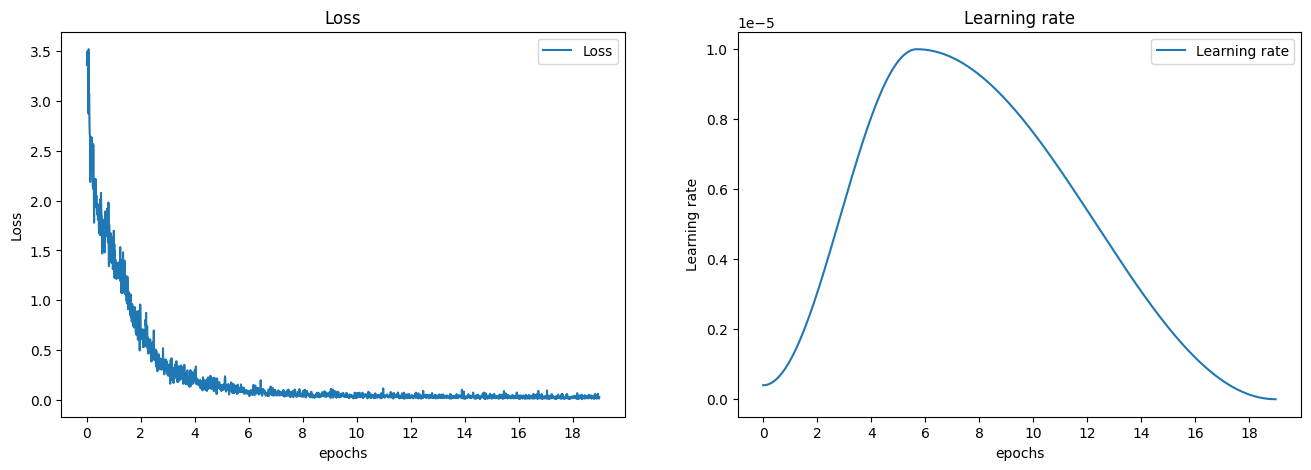

In [ ]:
plotting(history)